In [27]:
import os
import io
import sys

import argparse
import numpy as np
import pickle

In [31]:
from MulticoreTSNE import MulticoreTSNE as TSNE
import matplotlib.pyplot as plt

with open("../pointnet/global_shape_3503.pkl", "rb") as f:
    shape_info = pickle.load(f)
# shape_info = np.load("../pointnet/global_shape_3503.npy", allow_pickle=True)
# np.load(io.BytesIO(open('../pointnet/global_shape_3503.npy', 'rb').read()), allow_pickle=True)
print(shape_info.keys())
all_shapes = shape_info['shapes']
objects = shape_info['objects']
labels = shape_info['labels']



dict_keys(['shapes', 'labels', 'objects'])


In [ ]:
print(shape_info)

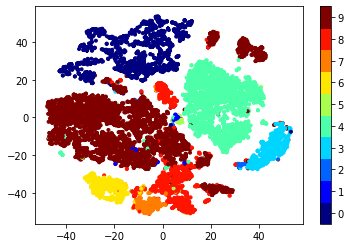

In [32]:
tsne = TSNE(n_jobs=8)
embeddings = tsne.fit_transform(all_shapes)
vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]
plt.scatter(vis_x, vis_y, c=objects, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

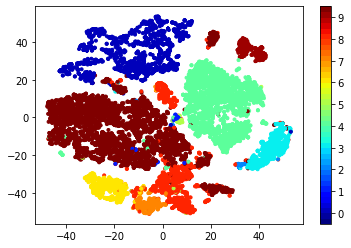

In [40]:
plt.scatter(vis_x, vis_y, c=objects, cmap=plt.cm.get_cmap("jet", 40), marker='.')
plt.colorbar(ticks=range(40))
plt.clim(-0.5, 9.5)
plt.show()

In [39]:
print(embeddings.shape)

(14007, 2)


(14007,) 6
(587,) (1762,)
(587,) (587,)


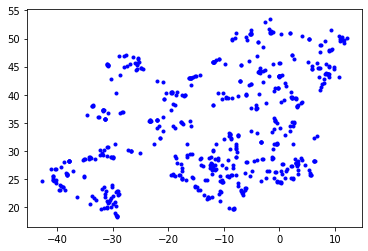

In [69]:
objects = np.array(objects)
labels = np.array(labels)
print(labels.shape, objects[0])
idx = np.where(objects==0)[0]
# print(idx.shape)

colors = plt.cm.jet(np.linspace(0, 1, 2))

# airplanes = embeddings[idx,:]
# airplanes_labels = labels[idx]
# print(np.where(airplanes_labels==1)[0].shape, np.where(airplanes_labels==0)[0].shape)
# print(embeddings.shape, airplanes.shape)

# label = np.where(airplanes_labels==1)[0]
# unlabel = np.where(airplanes_labels==0)[0]



label = np.where((objects == 0) & (labels == 1))[0]
unlabel = np.where((objects == 0) & (labels == 0))[0]

print(label.shape, unlabel.shape)

vis_x = embeddings[label, 0]
vis_y = embeddings[label, 1]

print(vis_x.shape, vis_y.shape)
plt.scatter(vis_x, vis_y, c='b', marker='.')
# plt.colorbar(ticks=range(2))
plt.clim(-0.5, 9.5)
plt.show()